In [21]:
__precompile__() # Este comando es para que julia precompile el paquete

module herramientas

export newton

"""documentación del método de Newton"""
function newton(f,df,x0)
    x=x0
    for i in 1:20
       x=x-f(x)/df(x) 
    end
    return x
end

end

herramientas

In [22]:
herramientas.newton(x->x^2-2,x->2*x,1)


1.414213562373095

In [18]:
__precompile__() # Este comando es para que julia precompile el paquete

module herramientas

export newton2

"""documentación del segundo método de Newton"""

function newton2(f,xi,h,error=1e-10) #función calculadora de raices 
    #usando el método de Newton nuevamente, pero ahora sólo tomando las raices hasta 
    #cierto valor denotado por "error".
    df=f(xi+h)-f(xi)
    d=error+1
    while error<d
        xi=xi-f(xi)/(df)
        d=(f(xi)^2)^(1/2)
    end
    return xi #Regresa la raiz.
end
end

herramientas

In [19]:
herramientas.newton2(sin,2,0.9)


3.141592653529164

In [23]:
__precompile__() # Este comando es para que julia precompile el paquete

module herramientas

export newton3

"""documentación del tercer método de Newton"""

function newton3(f,xa,xb,h,error=1e-10) #Se crea una rutina donde en lugar de 
    #tomar una sóla condición inicial, reciba un rango de condiciones iniciales.
    raices=[] #Se define el vector raices.
    for i in linspace(xa,xb,200) #Se realiza la iteración 200 veces en el intervalo inicial.
        
        d=error+1
        while error<d
            i=i-f(i)/(f(i+h)-f(i))
            d=(f(i)^2)^(1/2)
        end
     
        push!(raices,i) #Guarda las raices en el vector definido raices.
    end
    return raices #Devuelve el vector.
end
end

herramientas

In [24]:
herramientas.newton3(sin,1.0,3.0,0.9)


200-element Array{Any,1}:
    -6.28319
    -9.42478
    -9.42478
    -9.42478
     3.14159
   -12.5664 
   -15.708  
   -18.8496 
   -84.823  
   -31.4159 
   -53.4071 
  -144.513  
 -5353.27   
     ⋮      
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159
     3.14159

In [25]:
__precompile__() # Este comando es para que julia precompile el paquete

module herramientas

export trapecio

"""documentación del método del Trapecio"""

function trapecio(f,a,b,n) #función calculadora de integrales con método del trapecio
    x=a
    R=0
    while x<b
        x=x+((b-a)/n)
        R += (b-a)*(f(x)+f(x+(b-a)/n))/2n
    end
   return R #Se regresa el valor de la integral.
end
end

herramientas

In [34]:
herramientas.trapecio(x->x,0,3,1000)


4.5089999999999595

In [37]:
__precompile__() # Este comando es para que julia precompile el paquete

module herramientas

export rectangulo

"""documentación del método del Rectángulo"""


function rectangulo(f,a,b,n) #función que calcule una integral usando el método del rectángulo tomando una función, el intervalo de integración, y el número de particiones del intervalo.
    x=a
    R=0
    while x<b
        x=x+((b-a)/n)
        R += ((b-a)/n)*f(x+((b-a)/2n))
    end
   return R #Se regresa el valor de la integral.
end
end

herramientas

In [38]:
herramientas.rectangulo(x->x,0,3,1000)


4.50899999999996

In [40]:
__precompile__() # Este comando es para que julia precompile el paquete

module herramientas

export simpson

"""documentación del método de Simpson"""

function simpson(f,a,b,n) #función de integrales usando Simpson que toma una función, el intervalo de integración, y el número de particiones del intervalo.
    x = a
    R = 0
    while x < b
        x = x + ((b-a) / n)
        R += (b - a) * (f(x) + 4 * f(x + (b-a) / 2n) + f(x + (b-a)/n)) / 6n
    end
   return R #Se regresa el valor de la integral.
end
end

herramientas

In [41]:
herramientas.simpson(x->x,0,3,1000)


4.50899999999996

In [42]:
__precompile__() # Este comando es para que julia precompile el paquete

module herramientas

export euler

"""documentación del método de Euler vectorial"""

function euler(f,list,x0) #función que implementa el método de Euler,toma como entradas una función, una lista y el valor inicial x0.
     x = x0 #Se asigna a x el valor inicial x0.
     h = list[2]-list[1] #Se escribe el paso de h.
     listx = [] #Se crea un vector vacío.
     for i in 2:length(list)
        t = i*h #Se calculan los valores de t.
        x = x + f(x,t)*h #Se realiza la operación del método de Euler.
        push!(listx,x) #Se guarda en listx los valores de x que se obtienen del método de Euler.
     end
     return listx #Se regresa la lista de x.
end
end

herramientas

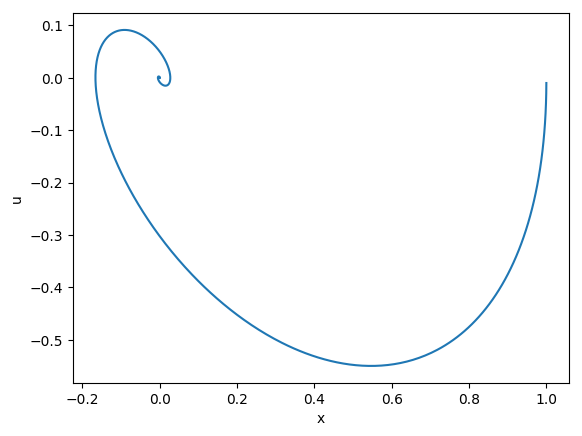

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2d946c05d0>

In [47]:
using PyPlot
h(x,t) = [x[2],-x[1]-x[2]] #función del oscilador armónico.
list = 0:0.01:500 #lista para euler.
R = herramientas.euler(h,list,[1,0]) #Se crea un vector particular para realizar el método de 
#Euler,con condiciones iniciales x(0)=1, x'(0)=1.
listx1 = map(x->x[1],R) 
listx2 = map(x->x[2],R) 
xlabel("x");ylabel("u")
plot(listx1,listx2) 


In [54]:
__precompile__() # Este comando es para que julia precompile el paquete

module herramientas

export eulerimplicito

"""documentación del método implícito de Euler"""

function eulerimplicito(f,x0,t0,tf,h) #función para obtener la solución aproximada de una ecuación diferencial con euler toma una función f, posición  inicial, tiempo, valor final de t, y el valor de h.
    listt = [] #Se crea un vector cuyo valor inicial es t0 y valor final tf donde la separación entre  sus valores está dada por el valor de h.
    listx = [] #Se crea un vector en donde se guardan los valores xk del método implícito de Euler.
    xk = x0
    
    for i in t0:h:tf
        push!(listt,i) 
    end

    for j in 1:length(listt) 
        push!(listx,xk) #Se guardan los valores xk en listx.
        g = - f(listt[j], xk)*h #Se define una función g que se usará en el método implícito.
        dg = 1 - f(listt[j], xk + h) + f(listt[j],xk) #Se escribe la derivada de la función g.
        xk = xk - g/dg #Se realiza la operación que determina los valores xk
    end
    
    return listt, listx #Se regresan la listas listt y listx.
end
end 

herramientas

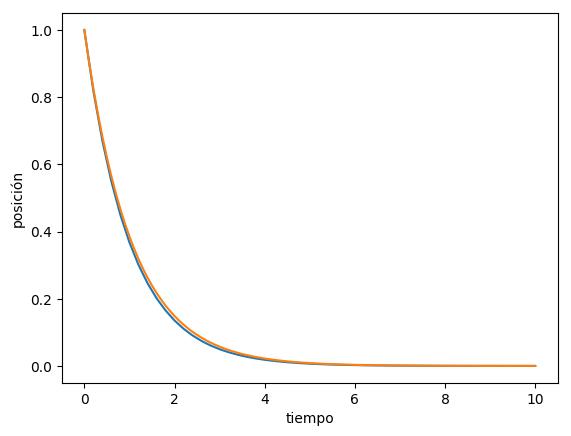

PyObject Text(0.5,24,u'tiempo')

In [55]:
g(t,x)= -x
herramientas.eulerimplicito(g,1,0,10,0.1)
#Se grafica la solución usando el método implícito y también se grafica la solución exacta.
t = []
x = []
for i in 0:50
    push!(t,10*i/50)
    push!(x,exp(-t[i+1]))
end
plot(t,x)
listt,listx = herramientas.eulerimplicito(g,1,0,10,0.1)
plot(listt,listx)
ylabel("posición")
xlabel("tiempo")



In [56]:
__precompile__() # Este comando es para que julia precompile el paquete

module herramientas

export RK4

"""documentación del método de Runge-Kutta de orden 4 """

function RK4(f,list,x0) #función que usa Runge-Kutta de orden 4 , obtener la solución aproximada de una ecuación diferencial. 
    
    x = x0
    h = list[2]-list[1] #Se calcula el tamaño del paso.
    listx = [] #Se crea un vector en donde se guardan los valores xk del método de Runge.
    push!(listx,x) #Se  guardan la los valores de x en listx.
    
        for i in 2:length(list) #Se realiza un for donde se da un intervalo a i cuyo tamaño es el
        #de la lista t.
            t = i*h
            #Se definen funciones necesarias para implementar el método de Runge-Kutta de orden 4.
            k1 = f(x,t)
            k2 = f(x + ((h/2) * k1),t + h/2)
            k3 = f(x + ((h/2) * k2),t + h/2)
            k4 = f(x + h * k3,t + h)
            x = x + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)#Se realiza la operación que determina los 
            #valores xk.
            push!(listx,x) #Se guarda el valor de xk en la lista x.
        end
     return listx #Se regresa la lista listx.
end

end

herramientas

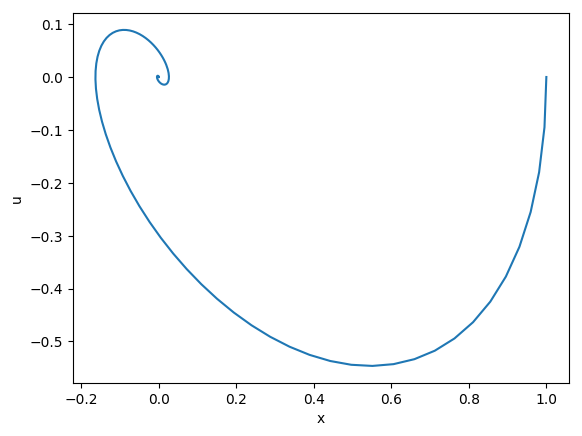

In [57]:
h(x,t) = [x[2],-x[1]-x[2]] #Se define la función asociada al sistema de ecuaciones del oscilador armónico amortiguado.
list1 = 0:0.1:200 
herramientas.RK4(h,list1,[1,0]) #definimos condiciones iniciales x(0)=1, x'(0)=1
R1 = herramientas.RK4(h,list1,[1,0]) #definimos un vector donde usando 
listx3 = map(x->x[1],R1) #Guarda  los elementos x[1] de cada elemeno de vec1 en listx3.
listx4 = map(x->x[2],R1) #Guarda  los elementos x[2] de cada elemeno de vec1 en listx4.
xlabel("x");ylabel("u")
plot(listx3,listx4) #Se grafica posición contra velocidad usando Runge-Kutta.
legend()